Problem 1

Context

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

Objective

The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

Data Description

vote: Party choice: Conservative or Labour
age: in years
economic.cond.national: Assessment of current national economic conditions, 1 to 5.
economic.cond.household: Assessment of current household economic conditions, 1 to 5.
Blair: Assessment of the Labour leader, 1 to 5.
Hague: Assessment of the Conservative leader, 1 to 5.
Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
gender: female or male.

## Upload Required Libraries

In [12]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
import seaborn as sns
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")


## Importing data

In [13]:
df=pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes",index_col=0)

In [14]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


## EDA

In [15]:
# Shape of the dataframe
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [69]:
# Check Shape
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1525, 9)


In [70]:
# Check Data Types
print("Data types:\n", df.dtypes)

Data types:
 vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object


In [17]:
# Statistical Summary
print("Statistical summary:\n", df.describe().T)

Statistical summary:
                           count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0  


### Univariate Analysis

In [19]:

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Identify categorical and numerical variables
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

Missing values:
 vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [73]:
# Analyze categorical variables
for col in categorical_cols:
    print(f"\nVariable: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Value counts:\n{df[col].value_counts()}")

# Analyze numerical variables
for col in numerical_cols:
    print(f"\nVariable: {col}")
    print(f"Minimum value: {df[col].min()}")
    print(f"Maximum value: {df[col].max()}")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Standard deviation: {df[col].std():.2f}")


Variable: vote
Unique values: ['Labour' 'Conservative']
Value counts:
vote
Labour          1063
Conservative     462
Name: count, dtype: int64

Variable: gender
Unique values: ['female' 'male']
Value counts:
gender
female    812
male      713
Name: count, dtype: int64

Variable: age
Minimum value: 24
Maximum value: 93
Mean: 54.18
Standard deviation: 15.71

Variable: economic.cond.national
Minimum value: 1
Maximum value: 5
Mean: 3.25
Standard deviation: 0.88

Variable: economic.cond.household
Minimum value: 1
Maximum value: 5
Mean: 3.14
Standard deviation: 0.93

Variable: Blair
Minimum value: 1
Maximum value: 5
Mean: 3.33
Standard deviation: 1.17

Variable: Hague
Minimum value: 1
Maximum value: 5
Mean: 2.75
Standard deviation: 1.23

Variable: Europe
Minimum value: 1
Maximum value: 11
Mean: 6.73
Standard deviation: 3.30

Variable: political.knowledge
Minimum value: 0
Maximum value: 3
Mean: 1.54
Standard deviation: 1.08


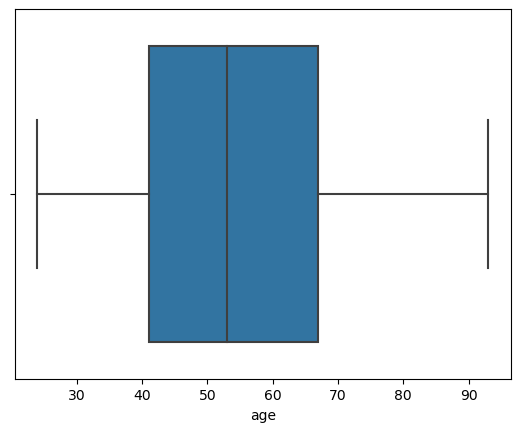

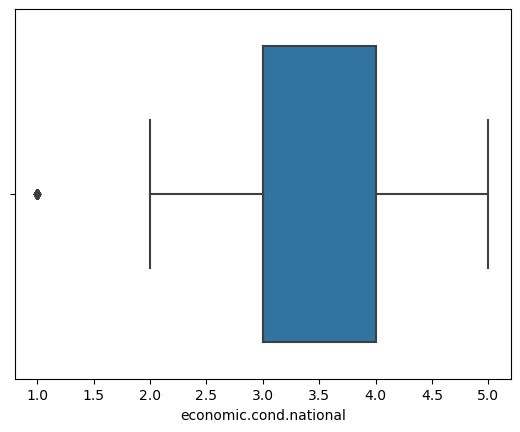

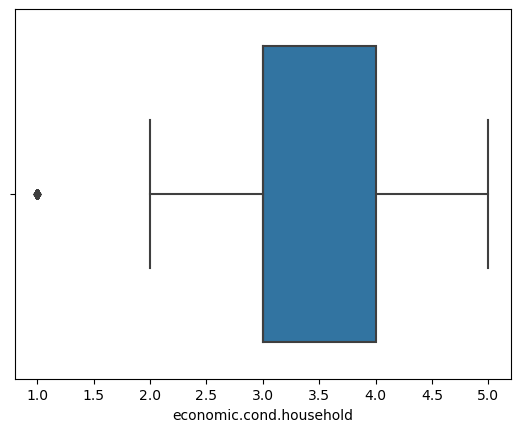

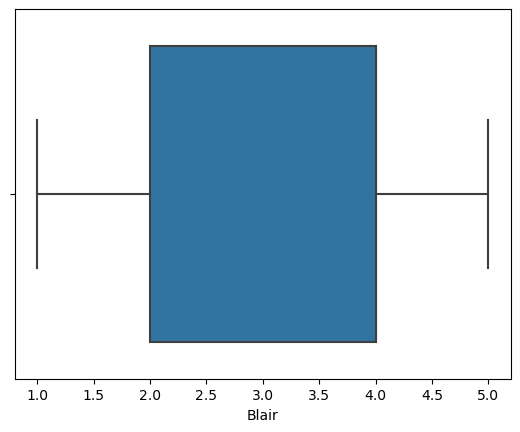

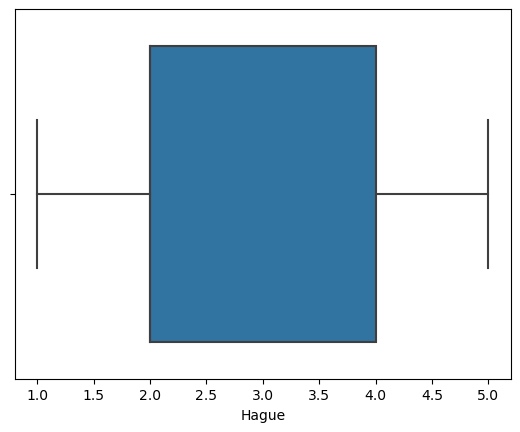

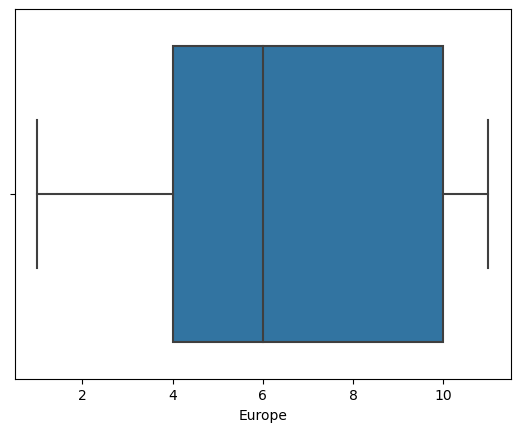

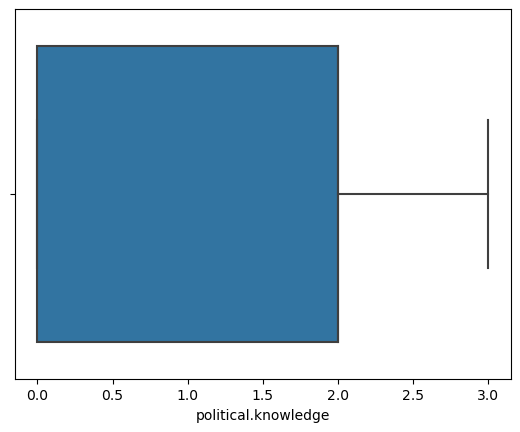

In [27]:
# Boxplots for numerical variables
for col in numerical_cols:
    sns.boxplot(x=df[col],orient='h')
    plt.show()


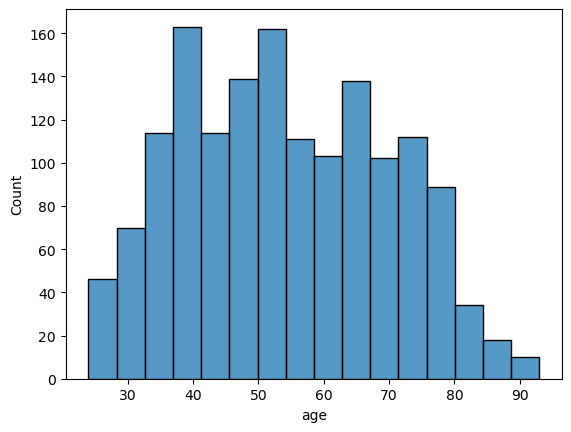

In [75]:
# Analyze the distribution of each variable using histograms or boxplots
sns.histplot(df['age'])
plt.show()

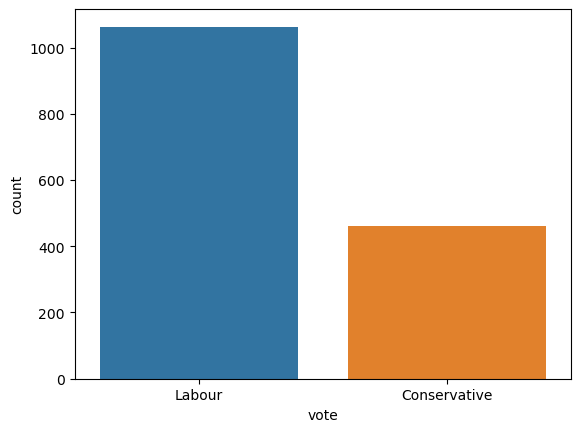

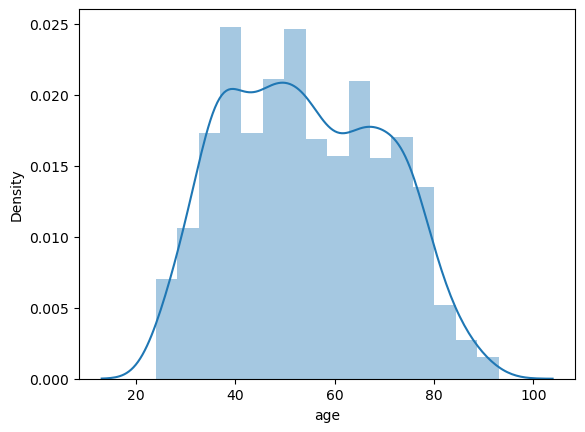

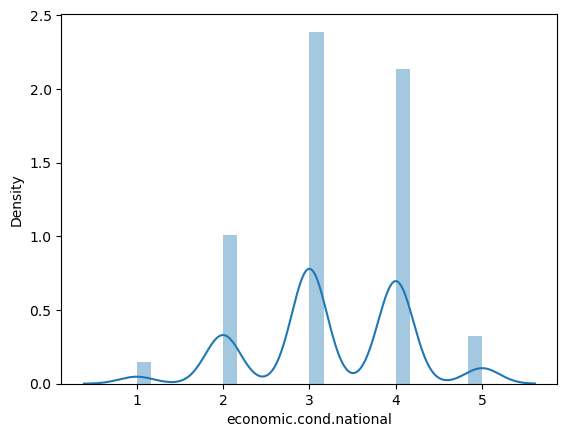

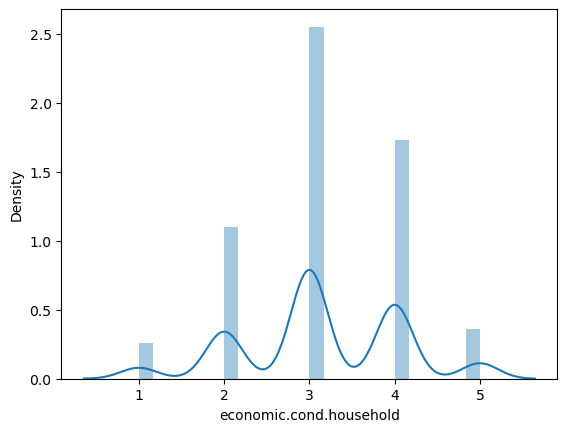

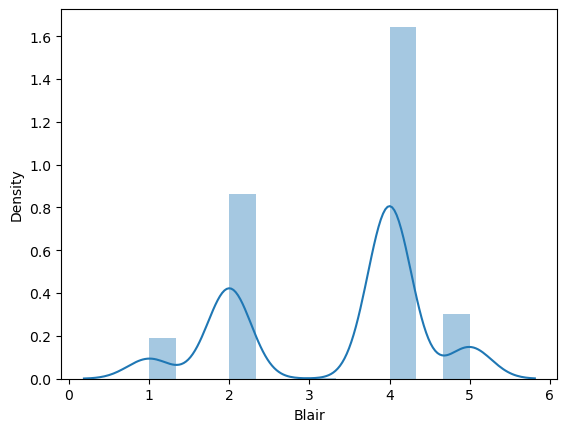

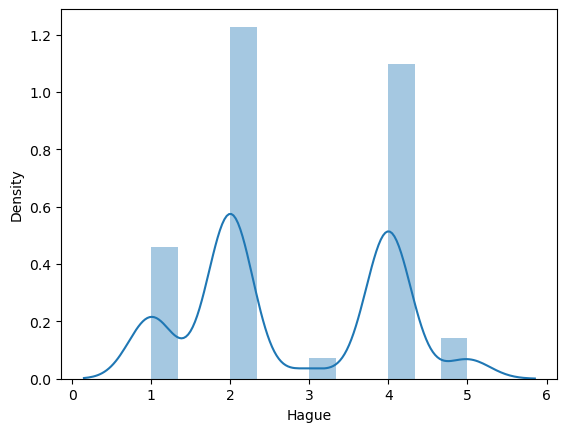

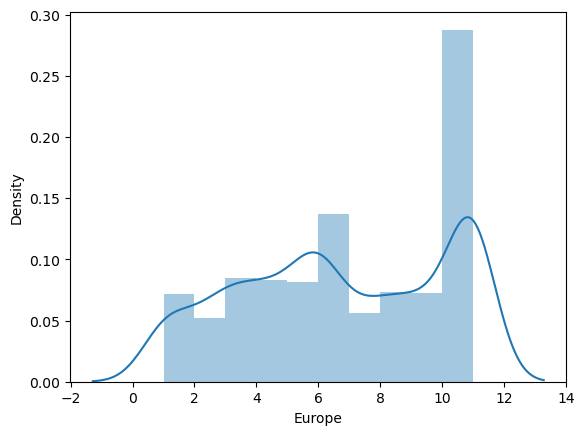

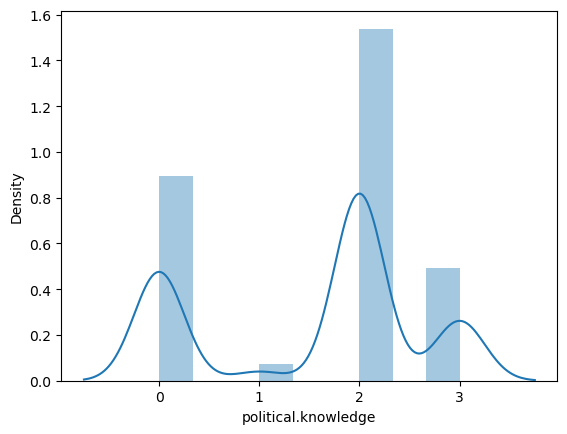

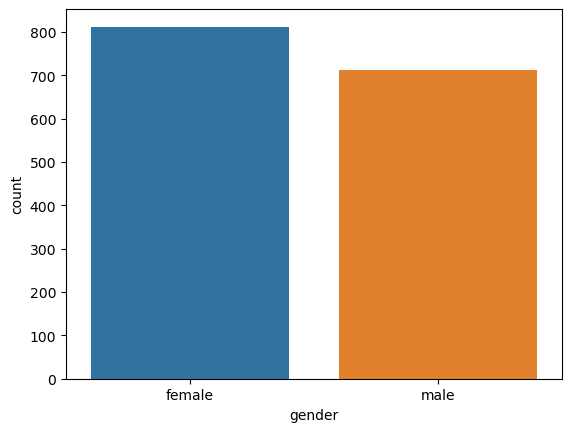

In [76]:
# Univariate analysis
for col in df.columns:
  if df[col].dtype != 'object':  # Check if the column is numerical
    sns.distplot(df[col])
    plt.show()
  else:
    # Handle categorical variables differently, e.g., using countplot
    sns.countplot(x=col, data=df)
    plt.show()


<Axes: xlabel='Blair', ylabel='age'>

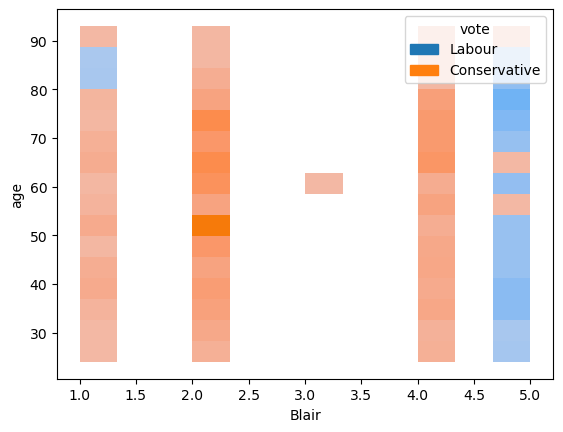

In [77]:
sns.histplot(data=df, x="Blair", y="age", hue="vote",multiple="stack")


<Axes: xlabel='economic.cond.household', ylabel='age'>

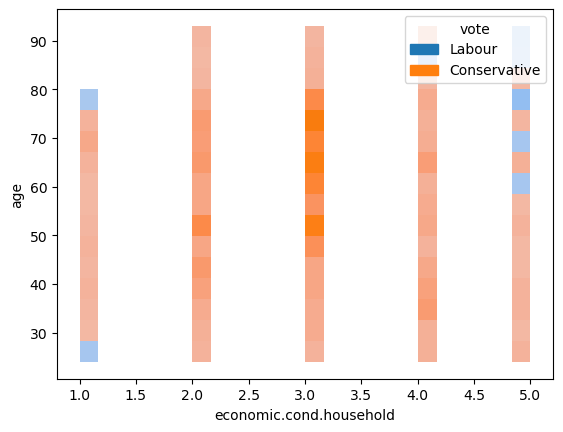

In [78]:
sns.histplot(data=df, x="economic.cond.household", y="age", hue="vote",multiple="stack")


<Axes: xlabel='economic.cond.national', ylabel='age'>

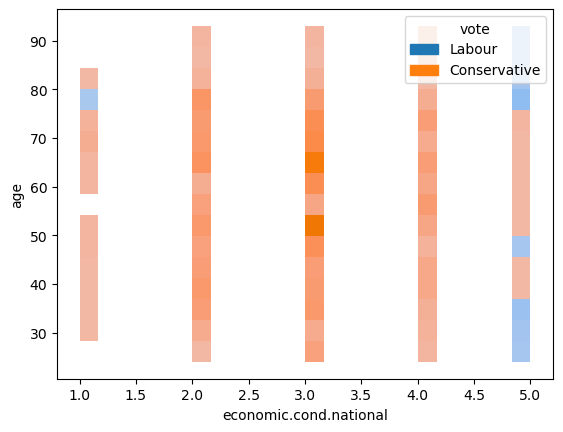

In [79]:
sns.histplot(data=df, x="economic.cond.national", y="age", hue="vote",multiple="stack")


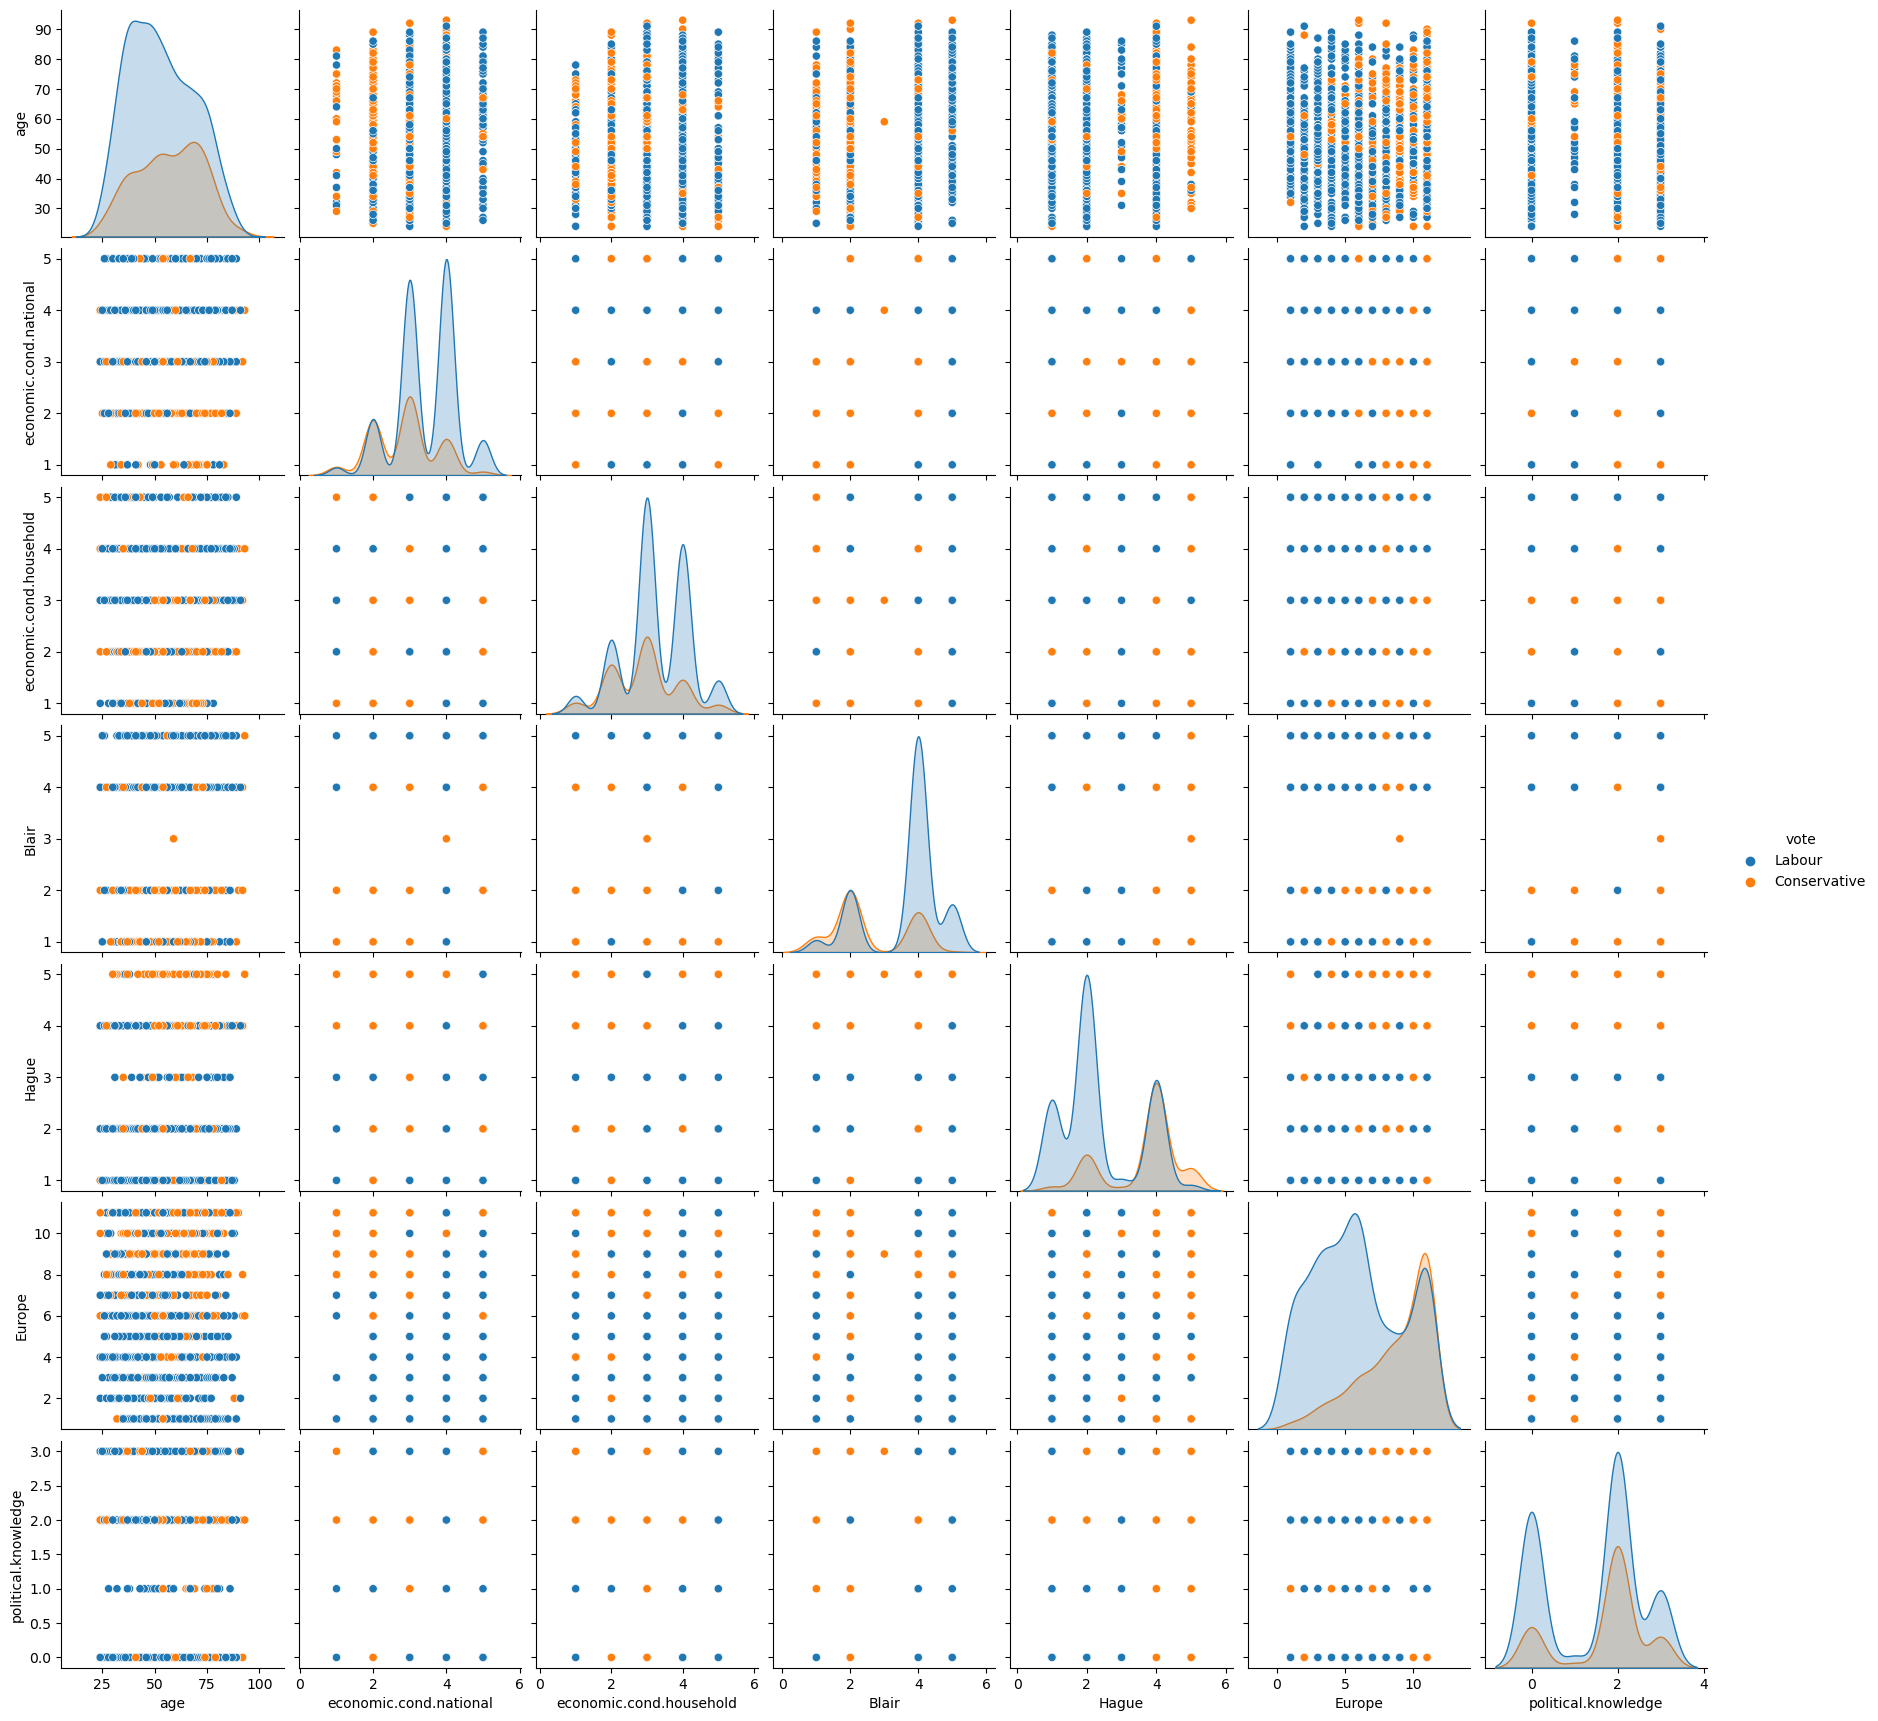

In [28]:
sns.pairplot(df, hue='vote')
plt.savefig('Pairplot.jpg')


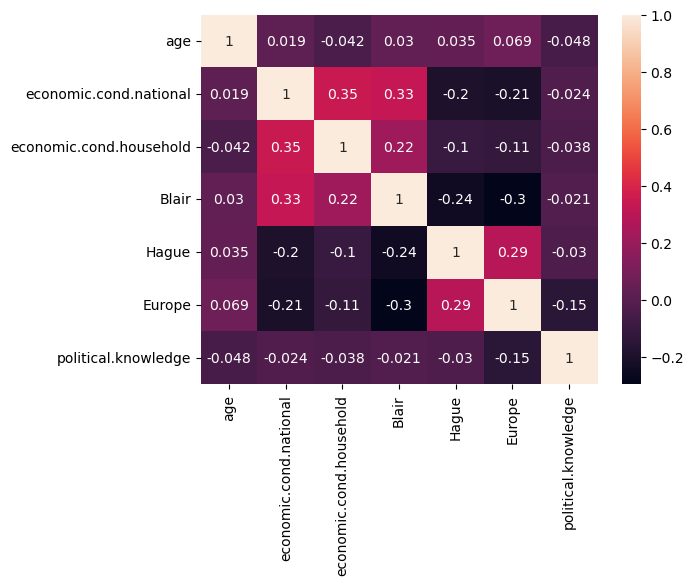

In [29]:
# Multivariate analysis
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])  # Select numerical columns

# Correlation matrix
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.savefig('Heatmap.jpg')
plt.show()

# Key Observations:

The dataset contains 1525 rows and 9 columns.
There are no missing values in the dataset.

There are few outliers in the column - economic.cond.national, economic.cond.household

The majority of the voters are between the ages of 30 and 60. The mean age of the voter is 54.

There are slightly more female voters than male voters.

There is a strong correlation between the variables economic.cond.national and economic.cond.household with 0.35 based on the heatmap Correlation matrix.
There is a strong correlation between the variables economic.cond.national and Blair with 0.33 based on the heatmap Correlation matrix.

Most of the votes are casted to the labour party than the conservative party.

### Prepare the data for modelling: - Outlier Detection(treat, if needed)) - Encode the data - Data split - Scale the data (and state your reasons for scaling the features)

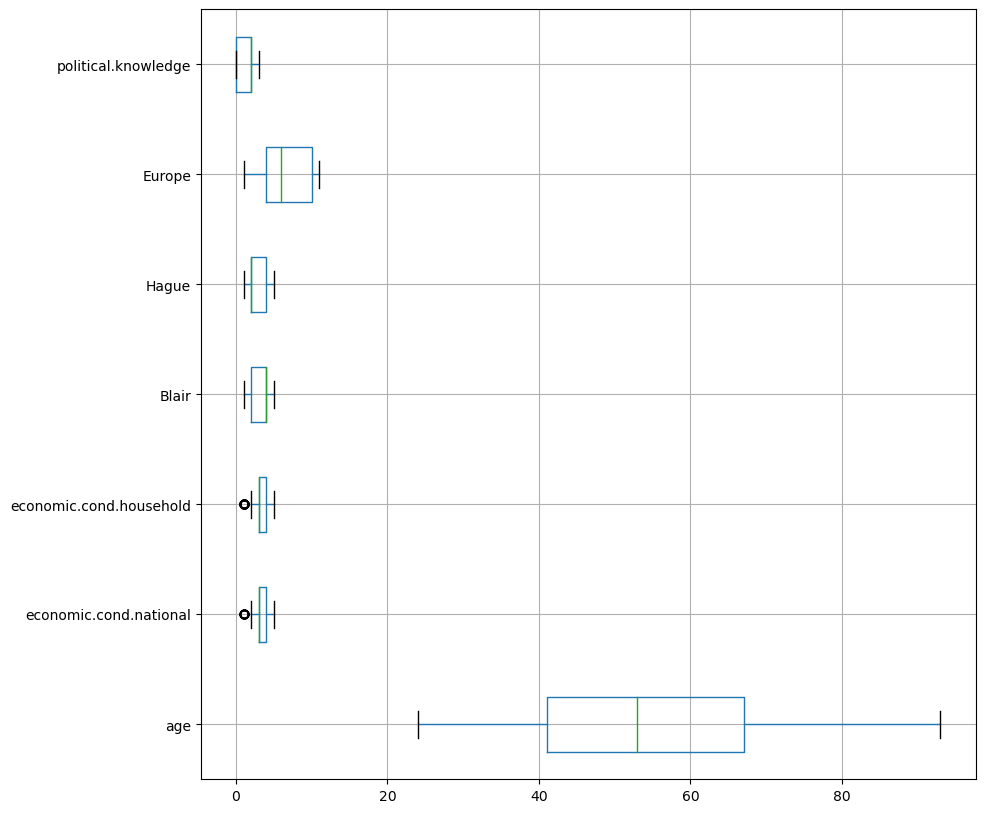

In [30]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df[numerical_df.columns].boxplot(vert=0) # Index df with the columns of numerical_df
plt.savefig('Before treating Outlier.jpg')
plt.show()

outlier treatment

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    # Instead of returning two values, filter the column and return the filtered column
    return col[(col >= lower_range) & (col <= upper_range)]

In [32]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

In [33]:
no_outlier = ['Blair','age','Hague','Europe','political.knowledge']

In [34]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [35]:
outlier_list

['economic.cond.national', 'economic.cond.household']

In [36]:
for i in df_num[outlier_list]:    
    df_num[i]=remove_outlier(df_num[i])

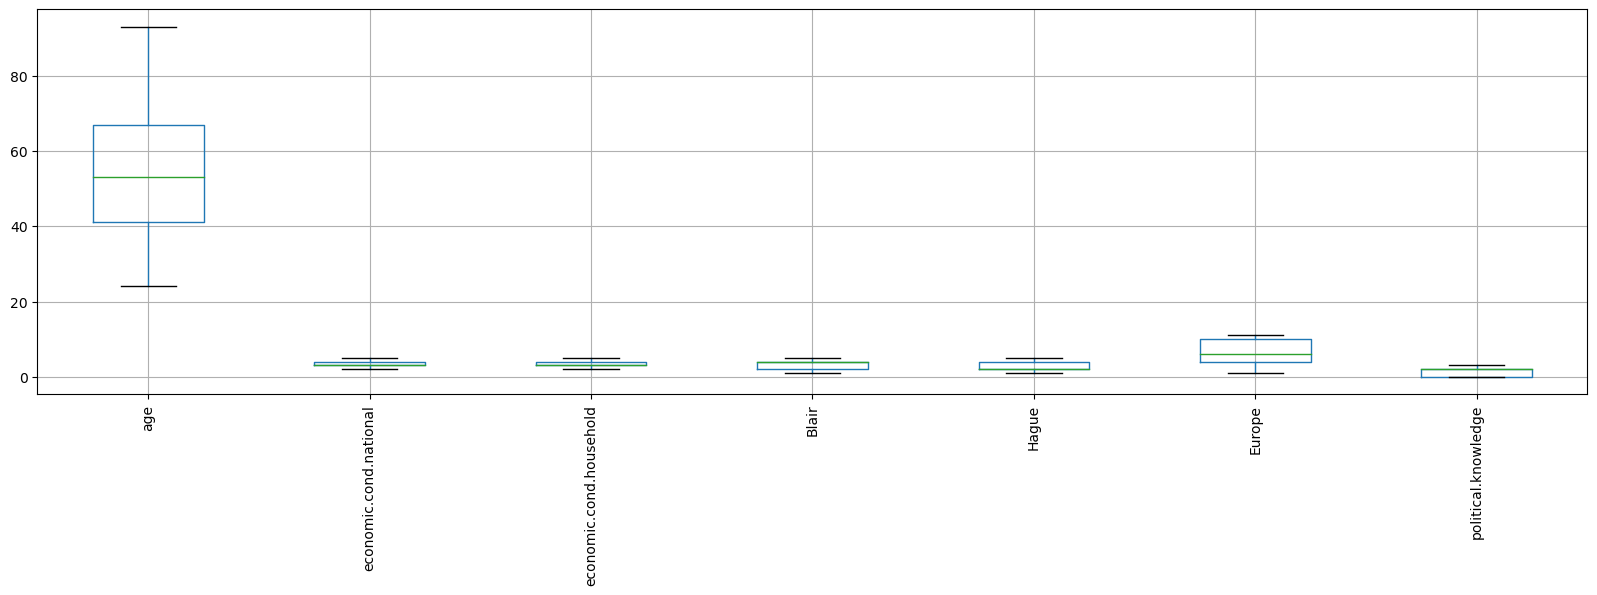

In [89]:
df_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [94]:
df['vote'].replace(['Conservative', 'Labour'], [1, 0], inplace=True)
df['vote'] = df['vote'].astype('int64')

In [99]:
df['gender'].replace(['male', 'female'], [1, 0], inplace=True)
df['gender'] = df['gender'].astype('int64')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int64
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int64
dtypes: int64(9)
memory usage: 119.1 KB


In [101]:
df.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,0.302951,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,0.467541
std,0.459685,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,0.499109
min,0.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000
50%,0.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,0.000000
75%,1.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000
max,1.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000


In [104]:
# Split the data into train and test sets
X = df.drop('vote', axis=1)
y = df['vote']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,0,43,3,3,4,1,2,2,0
2,0,36,4,4,4,4,5,2,1
3,0,35,4,4,5,2,3,2,1
4,0,24,4,2,2,1,4,0,0
5,0,41,2,2,1,1,6,2,1


In [106]:
# Model Building

# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Metrics of Choice
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Precision
precision_knn = precision_score(y_test, y_pred_knn)
precision_nb = precision_score(y_test, y_pred_nb)

# Recall
recall_knn = recall_score(y_test, y_pred_knn)
recall_nb = recall_score(y_test, y_pred_nb)

# F1 Score
f1_knn = f1_score(y_test, y_pred_knn)
f1_nb = f1_score(y_test, y_pred_nb)

# F1 Score
f1_knn = f1_score(y_test, y_pred_knn)
f1_nb = f1_score(y_test, y_pred_nb)

# Justification for Evaluation Metrics

# Accuracy:
# - It is a simple and intuitive metric that measures the proportion of correctly classified instances.

# Precision:
# - It is particularly useful when the cost of false positives is high.
# - It measures the proportion of predicted positives that are actually positive.

# Recall:
# - It is particularly useful when the cost of false negatives is high.
# - It measures the proportion of actual positives that are correctly predicted as positive.

# F1 Score:
# - It is a balanced metric that takes into account both precision and recall.
# - It is particularly useful when the cost of false positives and false negatives is roughly equal.

# Comparison of Models

print("KNN Accuracy:", accuracy_knn)
print("Naive Bayes Accuracy:", accuracy_nb)
print("KNN Precision:", precision_knn)
print("Naive Bayes Precision:", precision_nb)
print("KNN Recall:", recall_knn)
print("Naive Bayes Recall:", recall_nb)
print("KNN F1 Score:", f1_knn)
print("Naive Bayes F1 Score:", f1_nb)

KNN Accuracy: 0.7751091703056768
Naive Bayes Accuracy: 0.8144104803493449
KNN Precision: 0.6086956521739131
Naive Bayes Precision: 0.6904761904761905
KNN Recall: 0.631578947368421
Naive Bayes Recall: 0.6541353383458647
KNN F1 Score: 0.6199261992619925
Naive Bayes F1 Score: 0.6718146718146719


Confusion matrix for KNN train dataset:
[[679  59]
 [ 72 257]]
Classification report for KNN train data set:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       738
           1       0.81      0.78      0.80       329

    accuracy                           0.88      1067
   macro avg       0.86      0.85      0.85      1067
weighted avg       0.88      0.88      0.88      1067

Confusion matrix for KNN test dataset:
[[271  54]
 [ 49  84]]
Classification report for KNN test data set:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       325
           1       0.61      0.63      0.62       133

    accuracy                           0.78       458
   macro avg       0.73      0.73      0.73       458
weighted avg       0.78      0.78      0.78       458



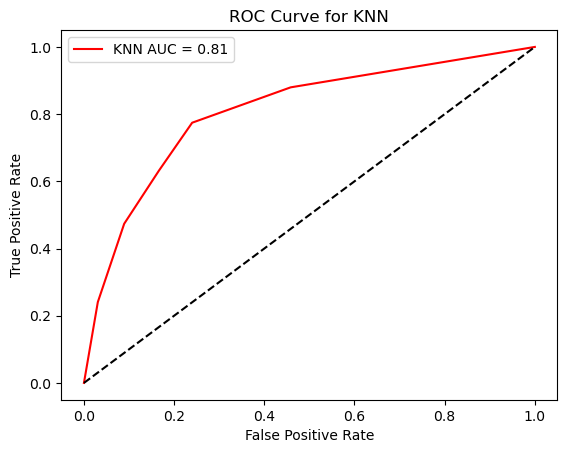

Confusion matrix for Naive Bayes train dataset:
[[657  81]
 [ 92 237]]
Classification report for Naive Bayes train dataset:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       738
           1       0.75      0.72      0.73       329

    accuracy                           0.84      1067
   macro avg       0.81      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067

Confusion matrix for Naive Bayes test dataset:
[[286  39]
 [ 46  87]]
Classification report for Naive Bayes test dataset:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       325
           1       0.69      0.65      0.67       133

    accuracy                           0.81       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



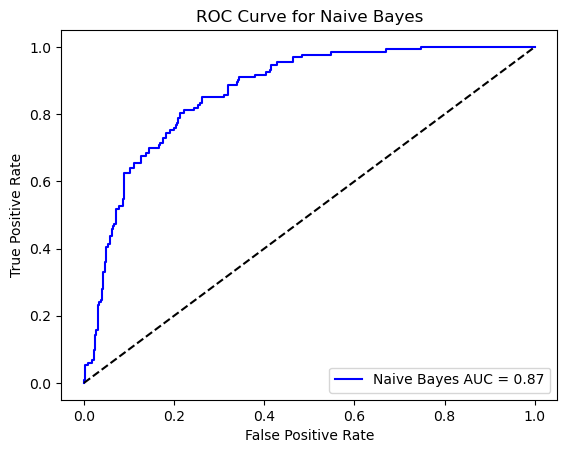

In [110]:

import matplotlib.pyplot as plt
# Confusion matrix
cm_knn = confusion_matrix(y_train, knn.predict(X_train))
print("Confusion matrix for KNN train dataset:")
print(cm_knn)

# Classification report
report_knn = classification_report(y_train, knn.predict(X_train))
print("Classification report for KNN train data set:")
print(report_knn)



# Confusion matrix for KNN
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix for KNN test dataset:")
print(cm_knn)

# Classification report for KNN
from sklearn.metrics import classification_report
report_knn = classification_report(y_test, y_pred_knn)
print("Classification report for KNN test data set:")
print(report_knn)

# ROC-AUC score and plot for KNN
from sklearn.metrics import roc_auc_score, roc_curve
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr_knn, tpr_knn, color='red', label='KNN AUC = %0.2f' % knn_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend()
plt.show()

# Confusion matrix
cm_nb = confusion_matrix(y_train, nb.predict(X_train))
print("Confusion matrix for Naive Bayes train dataset:")
print(cm_nb)

# Classification report
report_nb = classification_report(y_train, nb.predict(X_train))
print("Classification report for Naive Bayes train dataset:")
print(report_nb)



# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion matrix for Naive Bayes test dataset:")
print(cm_nb)

# Classification report for Naive Bayes
report_nb = classification_report(y_test, y_pred_nb)
print("Classification report for Naive Bayes test dataset:")
print(report_nb)

# ROC-AUC score and plot for Naive Bayes
nb_auc = roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr_nb, tpr_nb, color='blue', label='Naive Bayes AUC = %0.2f' % nb_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()


Bagging Accuracy: 0.8144104803493449
Boosting Accuracy: 0.7729257641921398
Bagging Precision: 0.6818181818181818
Boosting Precision: 0.6013986013986014
Bagging Recall: 0.6766917293233082
Boosting Recall: 0.6466165413533834
Bagging F1 Score: 0.6792452830188679
Boosting F1 Score: 0.6231884057971013
Confusion matrix for Bagging train dataset:
[[738   0]
 [  1 328]]
Classification report for Bagging train dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       738
           1       1.00      1.00      1.00       329

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067

Confusion matrix for Bagging test dataset:
[[283  42]
 [ 43  90]]
Classification report for Bagging test dataset:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       325
           1       0.68      0.68   

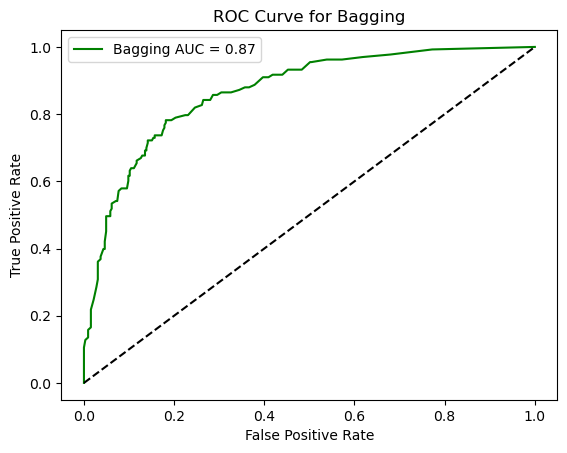

Confusion matrix for Boosting train dataset:
[[738   0]
 [  1 328]]
Classification report for Boosting train dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       738
           1       1.00      1.00      1.00       329

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067

Confusion matrix for Boosting test dataset:
[[268  57]
 [ 47  86]]
Classification report for Boosting test dataset:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       325
           1       0.60      0.65      0.62       133

    accuracy                           0.77       458
   macro avg       0.73      0.74      0.73       458
weighted avg       0.78      0.77      0.78       458



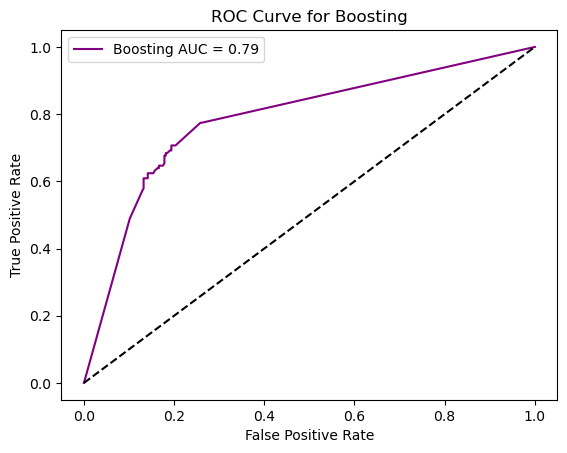

In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Create the base model
base_model = DecisionTreeClassifier()

# Create the bagging model
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

# Fit the bagging model
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Boosting

from sklearn.ensemble import AdaBoostClassifier

# Create the base model
base_model = DecisionTreeClassifier()

# Create the boosting model
boosting_model = AdaBoostClassifier(base_model, n_estimators=100, random_state=42)

# Fit the boosting model
boosting_model.fit(X_train, y_train)

# Make predictions
y_pred_boosting = boosting_model.predict(X_test)

# Metrics of Choice (Justify the evaluation metrics)

# Accuracy
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)

# Precision
precision_bagging = precision_score(y_test, y_pred_bagging)
precision_boosting = precision_score(y_test, y_pred_boosting)

# Recall
recall_bagging = recall_score(y_test, y_pred_bagging)
recall_boosting = recall_score(y_test, y_pred_boosting)

# F1 Score
f1_bagging = f1_score(y_test, y_pred_bagging)
f1_boosting = f1_score(y_test, y_pred_boosting)

# Justification for Evaluation Metrics

# Accuracy:
# - It is a simple and intuitive metric that measures the proportion of correctly classified instances.

# Precision:
# - It is particularly useful when the cost of false positives is high.
# - It measures the proportion of predicted positives that are actually positive.

# Recall:
# - It is particularly useful when the cost of false negatives is high.
# - It measures the proportion of actual positives that are correctly predicted as positive.

# F1 Score:
# - It is a balanced metric that takes into account both precision and recall.
# - It is particularly useful when the cost of false positives and false negatives is roughly equal.

# Comparison of Models

print("Bagging Accuracy:", accuracy_bagging)
print("Boosting Accuracy:", accuracy_boosting)
print("Bagging Precision:", precision_bagging)
print("Boosting Precision:", precision_boosting)
print("Bagging Recall:", recall_bagging)
print("Boosting Recall:", recall_boosting)
print("Bagging F1 Score:", f1_bagging)
print("Boosting F1 Score:", f1_boosting)

# Based on the evaluation metrics, the boosting model performs better than the bagging model.

# Confusion matrix
cm_bagging = confusion_matrix(y_train, bagging_model.predict(X_train))
print("Confusion matrix for Bagging train dataset:")
print(cm_bagging)

# Classification report
report_bagging = classification_report(y_train, bagging_model.predict(X_train))
print("Classification report for Bagging train dataset:")
print(report_bagging)

# Confusion matrix for Bagging
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
print("Confusion matrix for Bagging test dataset:")
print(cm_bagging)

# Classification report for Bagging
report_bagging = classification_report(y_test, y_pred_bagging)
print("Classification report for Bagging test dataset:")
print(report_bagging)

# ROC-AUC score and plot for Bagging
bagging_auc = roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:,1])
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, bagging_model.predict_proba(X_test)[:,1])
plt.plot(fpr_bagging, tpr_bagging, color='green', label='Bagging AUC = %0.2f' % bagging_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging')
plt.legend()
plt.show()

# Confusion matrix
cm_boosting = confusion_matrix(y_train, boosting_model.predict(X_train))
print("Confusion matrix for Boosting train dataset:")
print(cm_boosting)

# Classification report
report_boosting = classification_report(y_train, boosting_model.predict(X_train))
print("Classification report for Boosting train dataset:")
print(report_boosting)

# Confusion matrix for Boosting
cm_boosting = confusion_matrix(y_test, y_pred_boosting)
print("Confusion matrix for Boosting test dataset:")
print(cm_boosting)

# Classification report for Boosting
report_boosting = classification_report(y_test, y_pred_boosting)
print("Classification report for Boosting test dataset:")
print(report_boosting)

# ROC-AUC score and plot for Boosting
boosting_auc = roc_auc_score(y_test, boosting_model.predict_proba(X_test)[:,1])
fpr_boosting, tpr_boosting, thresholds_boosting = roc_curve(y_test, boosting_model.predict_proba(X_test)[:,1])
plt.plot(fpr_boosting, tpr_boosting, color='purple', label='Boosting AUC = %0.2f' % boosting_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Boosting')
plt.legend()
plt.show()

In [112]:
# Tune the bagging model
bagging_model_tuned = BaggingClassifier(base_model, n_estimators=200, random_state=42)
bagging_model_tuned.fit(X_train, y_train)

# Tune the boosting model
boosting_model_tuned = AdaBoostClassifier(base_model, n_estimators=200, random_state=42)
boosting_model_tuned.fit(X_train, y_train)

# Train performance

# Bagging
print("Bagging Train Accuracy:", accuracy_score(y_train, bagging_model_tuned.predict(X_train)))
print("Bagging Train Precision:", precision_score(y_train, bagging_model_tuned.predict(X_train)))
print("Bagging Train Recall:", recall_score(y_train, bagging_model_tuned.predict(X_train)))
print("Bagging Train F1 Score:", f1_score(y_train, bagging_model_tuned.predict(X_train)))

# Boosting
print("Boosting Train Accuracy:", accuracy_score(y_train, boosting_model_tuned.predict(X_train)))
print("Boosting Train Precision:", precision_score(y_train, boosting_model_tuned.predict(X_train)))
print("Boosting Train Recall:", recall_score(y_train, boosting_model_tuned.predict(X_train)))
print("Boosting Train F1 Score:", f1_score(y_train, boosting_model_tuned.predict(X_train)))

# Test performance

# Bagging
print("Bagging Test Accuracy:", accuracy_score(y_test, bagging_model_tuned.predict(X_test)))
print("Bagging Test Precision:", precision_score(y_test, bagging_model_tuned.predict(X_test)))
print("Bagging Test Recall:", recall_score(y_test, bagging_model_tuned.predict(X_test)))
print("Bagging Test F1 Score:", f1_score(y_test, bagging_model_tuned.predict(X_test)))

# Boosting
print("Boosting Test Accuracy:", accuracy_score(y_test, boosting_model_tuned.predict(X_test)))
print("Boosting Test Precision:", precision_score(y_test, boosting_model_tuned.predict(X_test)))
print("Boosting Test Recall:", recall_score(y_test, boosting_model_tuned.predict(X_test)))
print("Boosting Test F1 Score:", f1_score(y_test, boosting_model_tuned.predict(X_test)))

Bagging Train Accuracy: 0.9990627928772259
Bagging Train Precision: 1.0
Bagging Train Recall: 0.9969604863221885
Bagging Train F1 Score: 0.9984779299847794
Boosting Train Accuracy: 0.9990627928772259
Boosting Train Precision: 1.0
Boosting Train Recall: 0.9969604863221885
Boosting Train F1 Score: 0.9984779299847794
Bagging Test Accuracy: 0.8209606986899564
Bagging Test Precision: 0.6976744186046512
Bagging Test Recall: 0.6766917293233082
Bagging Test F1 Score: 0.6870229007633587
Boosting Test Accuracy: 0.7838427947598253
Boosting Test Precision: 0.6180555555555556
Boosting Test Recall: 0.6691729323308271
Boosting Test F1 Score: 0.6425992779783394


In [113]:
models = [
    {
        "model": knn,
        "accuracy": accuracy_score(y_test, y_pred_knn),
        "precision": precision_score(y_test, y_pred_knn),
        "recall": recall_score(y_test, y_pred_knn),
        "f1_score": f1_score(y_test, y_pred_knn),
        "roc_auc": roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
    },
    {
        "model": nb,
        "accuracy": accuracy_score(y_test, y_pred_nb),
        "precision": precision_score(y_test, y_pred_nb),
        "recall": recall_score(y_test, y_pred_nb),
        "f1_score": f1_score(y_test, y_pred_nb),
        "roc_auc": roc_auc_score(y_test, nb.predict_proba(X_test)[:,1])
    },
    {
        "model": bagging_model,
        "accuracy": accuracy_score(y_test, y_pred_bagging),
        "precision": precision_score(y_test, y_pred_bagging),
        "recall": recall_score(y_test, y_pred_bagging),
        "f1_score": f1_score(y_test, y_pred_bagging),
        "roc_auc": roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:,1])
    },
    {
        "model": boosting_model,
        "accuracy": accuracy_score(y_test, y_pred_boosting),
        "precision": precision_score(y_test, y_pred_boosting),
        "recall": recall_score(y_test, y_pred_boosting),
        "f1_score": f1_score(y_test, y_pred_boosting),
        "roc_auc": roc_auc_score(y_test, boosting_model.predict_proba(X_test)[:,1])
    }
]

# Sort models by F1 score
models.sort(key=lambda model: model["f1_score"], reverse=True)

# Print the top 3 models
print("Top 3 Models:")
for model in models[:3]:
    print(f"- Model: {model['model']}")
    print(f"  Accuracy: {model['accuracy']}")
    print(f"  Precision: {model['precision']}")
    print(f"  Recall: {model['recall']}")
    print(f"  F1 Score: {model['f1_score']}")
    print(f"  ROC AUC: {model['roc_auc']}")

Top 3 Models:
- Model: BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)
  Accuracy: 0.8144104803493449
  Precision: 0.6818181818181818
  Recall: 0.6766917293233082
  F1 Score: 0.6792452830188679
  ROC AUC: 0.8669404279930595
- Model: GaussianNB()
  Accuracy: 0.8144104803493449
  Precision: 0.6904761904761905
  Recall: 0.6541353383458647
  F1 Score: 0.6718146718146719
  ROC AUC: 0.8667669172932331
- Model: AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=42)
  Accuracy: 0.7729257641921398
  Precision: 0.6013986013986014
  Recall: 0.6466165413533834
  F1 Score: 0.6231884057971013
  ROC AUC: 0.7859919028340082


From the above code, we can see that the top 3 models are: Bagging classifier, Gaussian Naive Bayes and adaboosting classifier.
We can choose either  Bagging classifier or Gaussian Naive Bayes, due to their accuracy, precision, Recall, F1 score and ROC AUC.

 The most important features in the boosting model are:
   - age
   - economic.cond.national
   - economic.cond.household
   - Blair
   - Hague

Suggestions:

1. The Conservative Party should focus on improving the national and household economic conditions to increase their chances of winning the vote.
2. The Labour Party should focus on maintaining their strong support among voters who are satisfied with the current economic conditions and who have a positive view of their leader, Blair.

### Problem 2
 

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
Code Snippet to extract the three speeches:

"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"

In [5]:
import numpy as np
import pandas as pd
import nltk
import random
import string

In [2]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\u411715\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

Problem 2 - Define the problem and Perform Exploratory Data Analysis
-Problem Definition - Find the number of Character, words & sentences in all three speeches

In [3]:

# Define the three speeches
speeches = [inaugural.raw('1941-Roosevelt.txt'),
           inaugural.raw('1961-Kennedy.txt'),
           inaugural.raw('1973-Nixon.txt')]

# Initialize counters
total_chars = 0
total_words = 0
total_sentences = 0

# Loop through each speech
for speech in speeches:
    # Count characters
    total_chars += len(speech)

    # Count words
    total_words += len(speech.split())

    # Count sentences
    total_sentences += speech.count('.') + speech.count('!') + speech.count('?')

# Print the results
print(f"Total characters: {total_chars}")
print(f"Total words: {total_words}")
print(f"Total sentences: {total_sentences}")

Total characters: 25180
Total words: 4569
Total sentences: 197


In [3]:

# Define the three speeches
speeches = [inaugural.raw('1941-Roosevelt.txt'),
           inaugural.raw('1961-Kennedy.txt'),
           inaugural.raw('1973-Nixon.txt')]

# Initialize counters
speech_1_chars = 0
speech_1_words = 0
speech_1_sentences = 0

speech_2_chars = 0
speech_2_words = 0
speech_2_sentences = 0

speech_3_chars = 0
speech_3_words = 0
speech_3_sentences = 0

# Loop through each speech
for i, speech in enumerate(speeches): # 'speeches' variable is now defined
    if i == 0:
        # Count characters
        speech_1_chars += len(speech)

        # Count words
        speech_1_words += len(speech.split())

        # Count sentences
        speech_1_sentences += speech.count('.') + speech.count('!') + speech.count('?')
    elif i == 1:
        # Count characters
        speech_2_chars += len(speech)

        # Count words
        speech_2_words += len(speech.split())

        # Count sentences
        speech_2_sentences += speech.count('.') + speech.count('!') + speech.count('?')
    elif i == 2:
        # Count characters
        speech_3_chars += len(speech)

        # Count words
        speech_3_words += len(speech.split())

        # Count sentences
        speech_3_sentences += speech.count('.') + speech.count('!') + speech.count('?')

# Print the results
print(f"Speech 1:")
print(f"Total characters: {speech_1_chars}")
print(f"Total words: {speech_1_words}")
print(f"Total sentences: {speech_1_sentences}")
print()

print(f"Speech 2:")
print(f"Total characters: {speech_2_chars}")
print(f"Total words: {speech_2_words}")
print(f"Total sentences: {speech_2_sentences}")
print()

print(f"Speech 3:")
print(f"Total characters: {speech_3_chars}")
print(f"Total words: {speech_3_words}")
print(f"Total sentences: {speech_3_sentences}")

Speech 1:
Total characters: 7571
Total words: 1360
Total sentences: 68

Speech 2:
Total characters: 7618
Total words: 1390
Total sentences: 57

Speech 3:
Total characters: 9991
Total words: 1819
Total sentences: 72


Problem 2 - Text cleaning
- Stopword removal - Stemming - find the 3 most common words used in all three speeches

In [6]:
# prompt: Problem 2 - Text cleaning
# - Stopword removal - remove punctuation -remove numbers-strip whitespace-remove words - Stemming - find the 3 most common words used in all three speeches separately

# Download required resources
nltk.download('stopwords')
nltk.download('inaugural')

# Define the three speeches
speeches = [inaugural.raw('1941-Roosevelt.txt'),
           inaugural.raw('1961-Kennedy.txt'),
           inaugural.raw('1973-Nixon.txt')]

from nltk.stem import PorterStemmer # Import the PorterStemmer class
# Initialize the PorterStemmer object
stemmer = PorterStemmer()

from nltk.corpus import stopwords
# Define stopwords
stop_words = set(stopwords.words('english'))

# Initialize counters for most common words
most_common_words_1 = {}
most_common_words_2 = {}
most_common_words_3 = {}

# Loop through each speech
for i, speech in enumerate(speeches):
    # Remove punctuation
    speech = ''.join([word for word in speech if word not in string.punctuation])

    # Remove numbers
    speech = ''.join([word for word in speech if not word.isdigit()])

    # Remove whitespace
    speech = ' '.join(speech.split())

    # Remove stopwords
    speech = ' '.join([word for word in speech.split() if word not in stop_words])

    # Stem words
    speech = ' '.join([stemmer.stem(word) for word in speech.split()])

    # Update most common words counter
    if i == 0:
        for word in speech.split():
            if word not in most_common_words_1:
                most_common_words_1[word] = 0
            most_common_words_1[word] += 1
    elif i == 1:
        for word in speech.split():
            if word not in most_common_words_2:
                most_common_words_2[word] = 0
            most_common_words_2[word] += 1
    elif i == 2:
        for word in speech.split():
            if word not in most_common_words_3:
                most_common_words_3[word] = 0
            most_common_words_3[word] += 1

# Find the three most common words
most_common_words_1 = sorted(most_common_words_1.items(), key=lambda item: item[1], reverse=True)[:3]
most_common_words_2 = sorted(most_common_words_2.items(), key=lambda item: item[1], reverse=True)[:3]
most_common_words_3 = sorted(most_common_words_3.items(), key=lambda item: item[1], reverse=True)[:3]

# Print the three most common words
print(f"Three most common words in speech 1: {most_common_words_1}")
print(f"Three most common words in speech 2: {most_common_words_2}")
print(f"Three most common words in speech 3: {most_common_words_3}")


Three most common words in speech 1: [('nation', 17), ('it', 14), ('the', 10)]
Three most common words in speech 2: [('let', 16), ('us', 12), ('power', 9)]
Three most common words in speech 3: [('us', 26), ('let', 22), ('america', 21)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u411715\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\u411715\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [4]:
# prompt: Problem 2 - Text cleaning
# - Stopword removal - remove punctuation -remove numbers-strip whitespace-remove words - Stemming - find the 3 most common words used in all three speeches

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download required resources
nltk.download('stopwords')
nltk.download('inaugural')

# Define the three speeches
speeches = [inaugural.raw('1941-Roosevelt.txt'),
           inaugural.raw('1961-Kennedy.txt'),
           inaugural.raw('1973-Nixon.txt')]

# Initialize the PorterStemmer object
stemmer = PorterStemmer()

# Define stopwords
stop_words = set(stopwords.words('english'))

# Initialize counters for most common words
most_common_words = {}

# Loop through each speech
for speech in speeches:
    # Remove punctuation
    speech = ''.join([word for word in speech if word not in string.punctuation])

    # Remove numbers
    speech = ''.join([word for word in speech if not word.isdigit()])

    # Remove whitespace
    speech = ' '.join(speech.split())

    # Remove stopwords
    speech = ' '.join([word for word in speech.split() if word not in stop_words])

    # Stem words
    speech = ' '.join([stemmer.stem(word) for word in speech.split()])

    # Update most common words counter
    for word in speech.split():
        if word not in most_common_words:
            most_common_words[word] = 0
        most_common_words[word] += 1

# Find the three most common words
most_common_words = sorted(most_common_words.items(), key=lambda item: item[1], reverse=True)[:3]

# Print the three most common words
print(f"Three most common words: {most_common_words}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u411715\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\u411715\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


Three most common words: [('us', 46), ('nation', 40), ('let', 39)]


Problem 2 - Plot Word cloud of all three speeches
- Show the most common words used in all three speeches in the form of word clouds

In [9]:


!pip install wordcloud

import matplotlib.pyplot as plt
# Import necessary libraries
from wordcloud import WordCloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00


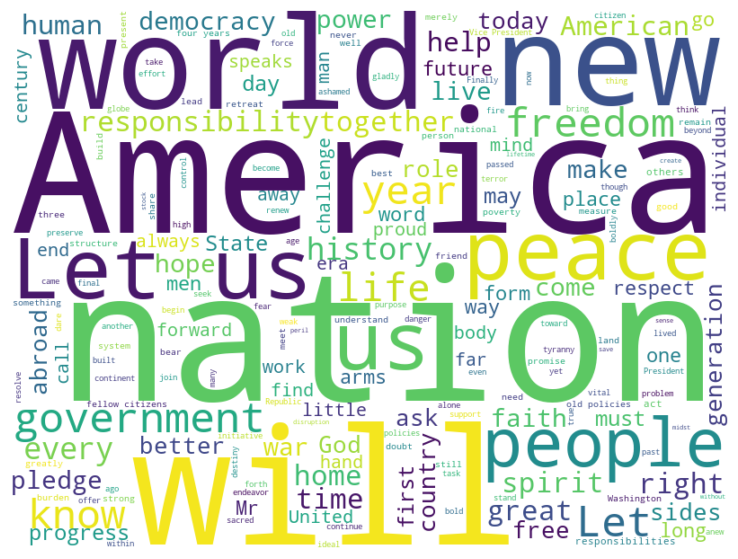

In [10]:
# Define the three speeches
speeches = [inaugural.raw('1941-Roosevelt.txt'),
           inaugural.raw('1961-Kennedy.txt'),
           inaugural.raw('1973-Nixon.txt')]

# Create a combined string of all speeches
combined_speech = ' '.join(speeches)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(combined_speech)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
